# Testing the code in wrapper_segementation

In [1]:
import SimpleITK as sitk
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import wrapper_segmentation
import util

In [3]:
# Not used, but should work
PATH_EXAMPLE_SINGLE = r"H:\Datasets\figshare\covid_rate\COVID-Rate-CT\p007\p07im004.dcm"

# This is the one that will be used
PATH_EXAMPLE_VOLUME = r"H:\Datasets\zenodo\covid_19_ct_lung_and_infection_segmentation_dataset\data\coronacases_001.nii.gz"

In [6]:
FONT_SIZE = 25

PLT_CMAP_VIRIDIS = plt.get_cmap("viridis")


def display_np_ndarray_shape_size_3(np_ndarray_given, amount_of_images_to_display):
    total_images = np_ndarray_given.shape[0]

    images_per_division = total_images // amount_of_images_to_display

    for index_row in range(amount_of_images_to_display):

        index_corrected = images_per_division * index_row

        plt.figure(figsize=(10, 10))
        plt.title(f"Slice Index: {index_corrected}",
                  fontsize=FONT_SIZE)  # Not set_title
        plt.imshow(np_ndarray_given[index_corrected])

# plt.subplots_adjust(wspace=0, hspace=0)


def display_np_ndarray_shape_size_3_multi(iterable_np_ndarray_given, amount_of_images_to_display):

    if(len(iterable_np_ndarray_given) == 1):
        display_np_ndarray_shape_size_3(
            iterable_np_ndarray_given[0],
            amount_of_images_to_display
        )
    else:

        set_np_ndarray_size = set([i.shape[0]
                                  for i in iterable_np_ndarray_given])

        assert len(set_np_ndarray_size) == 1

        total_images_1 = iterable_np_ndarray_given[0].shape[0]

        images_per_division = total_images_1 // amount_of_images_to_display

        amount_np_ndarray = len(iterable_np_ndarray_given)

        for index_row in range(amount_of_images_to_display):

            index_corrected = images_per_division * index_row

            fig, axes = plt.subplots(1, amount_np_ndarray)
            fig.set_size_inches(20, 20)
            fig.tight_layout()  # Will bring graphs closer

            for index_ax, np_ndarray in enumerate(iterable_np_ndarray_given):

                ax = axes[index_ax]
                ax.set_title(
                    f"np_ndarray_given_{index_ax} Slice Index: {index_corrected}")

                ax.imshow(
                    np_ndarray[index_corrected],
                    cmap=PLT_CMAP_VIRIDIS)

                ax.axis('off')
                ax.set_xticklabels([])
                ax.set_yticklabels([])

In [4]:
# sitk_image_lung_segmentation_lungmask_volume = wrapper_segmentation.get_sitk_image_lung_segmentation_lungmask_using_R231CovidWeb(
#     PATH_EXAMPLE_VOLUME)

In [5]:
# sitk_image_covid_19_segmentation_ct_lung_seg_volume = wrapper_segmentation.get_sitk_image_covid_19_segmentation_ct_lung_seg_using_R231CovidWeb(
#     PATH_EXAMPLE_VOLUME)

In [7]:
# np_ndarray_lung_segmentation_lungmask_volume = sitk.GetArrayFromImage(
#     sitk_image_lung_segmentation_lungmask_volume)

# display_np_ndarray_shape_size_3(
#     np_ndarray_lung_segmentation_lungmask_volume, 20)

In [8]:
# np_ndarray_covid_19_segmentation_ct_lung_seg_volume = sitk.GetArrayFromImage(
#     sitk_image_covid_19_segmentation_ct_lung_seg_volume)

# display_np_ndarray_shape_size_3(
#     np_ndarray_covid_19_segmentation_ct_lung_seg_volume, 20)

In [9]:
# display_np_ndarray_shape_size_3_multi(
#     (
#         np_ndarray_lung_segmentation_lungmask_volume,
#         np_ndarray_covid_19_segmentation_ct_lung_seg_volume
#     ),
#     20
# )

### Running automatic segmentation of the Lungs and Covid-19

In [10]:
(
    sitk_image_covid_19_segmentation_ct_lung_seg,
    sitk_image_lung_extracted_ct_lung_seg,
    np_ndarray_lung_segmentation_lungmask,
    model_handler,
    sitk_image_original
) = wrapper_segmentation.get_sitk_image_covid_19_segmentation_ct_lung_seg_using_R231CovidWeb_all_in_one(PATH_EXAMPLE_VOLUME)

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 71.42it/s]


In [11]:
np_ndarray_original = sitk.GetArrayFromImage(sitk_image_original)

np_ndarray_lung_extracted_ct_lung_seg = sitk.GetArrayFromImage(
    sitk_image_lung_extracted_ct_lung_seg)

np_ndarray_covid_19_segmentation_ct_lung_seg = sitk.GetArrayFromImage(
    sitk_image_covid_19_segmentation_ct_lung_seg)

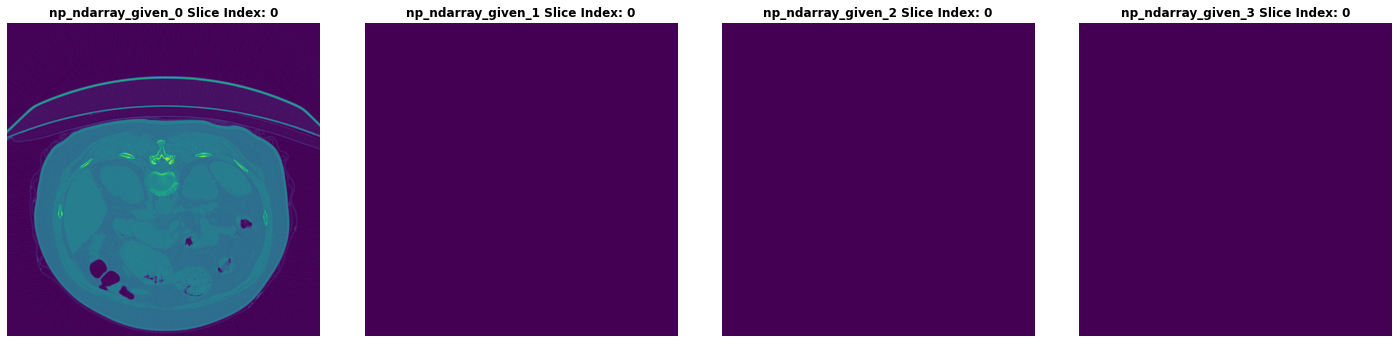

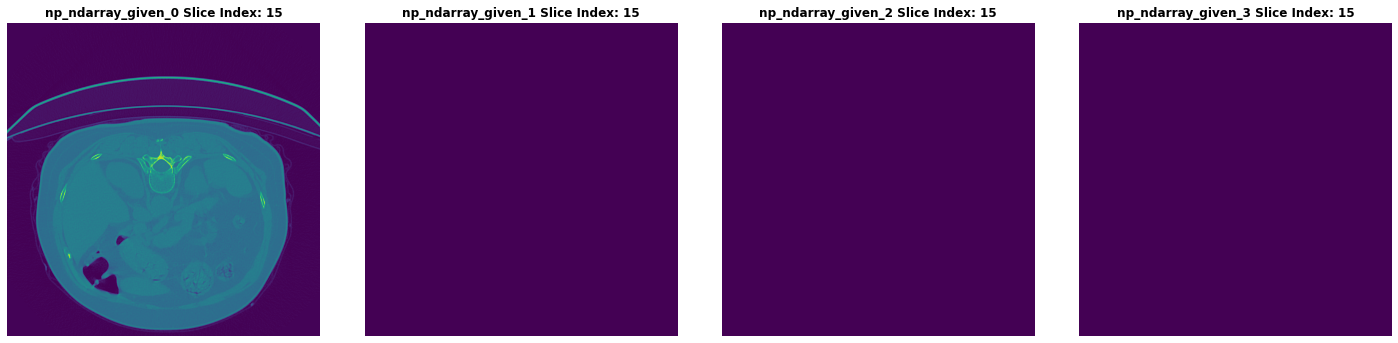

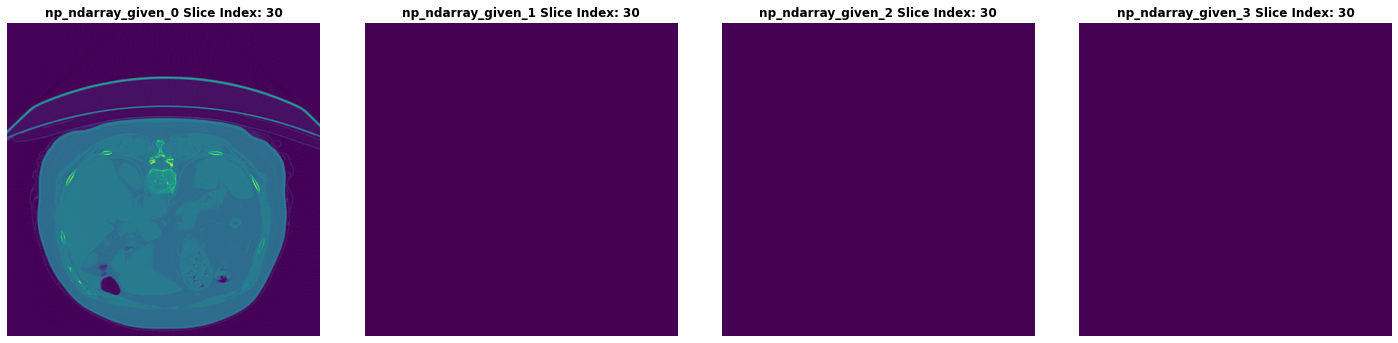

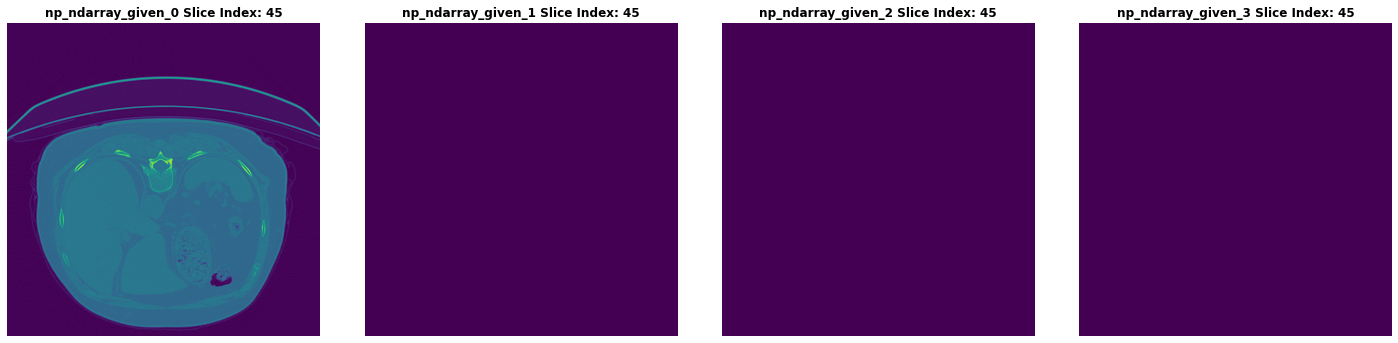

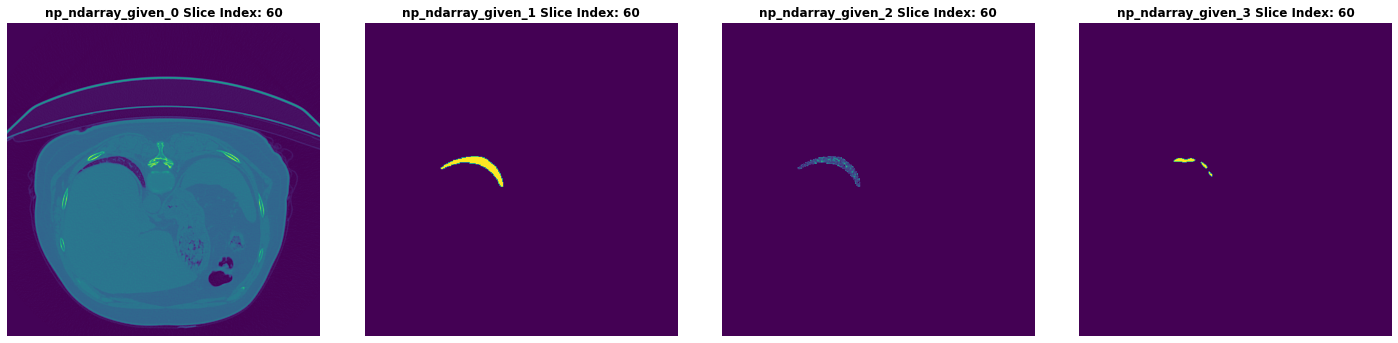

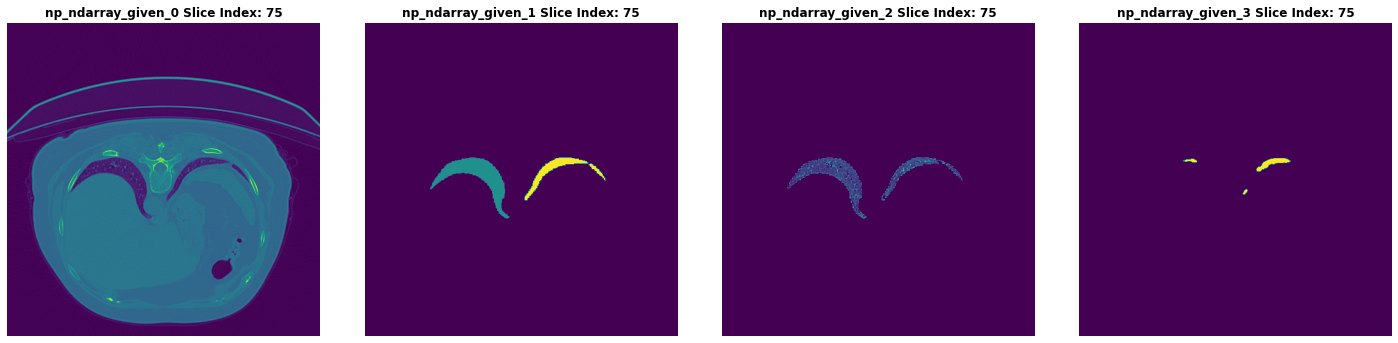

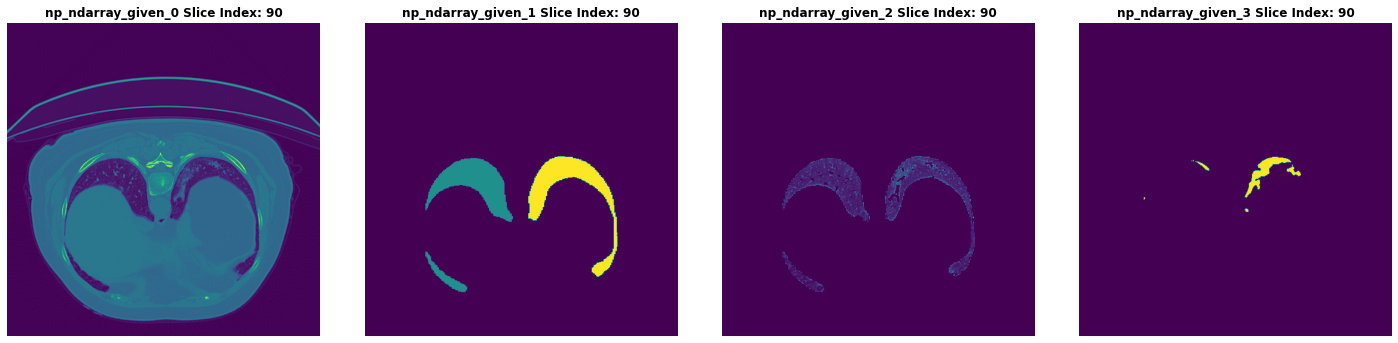

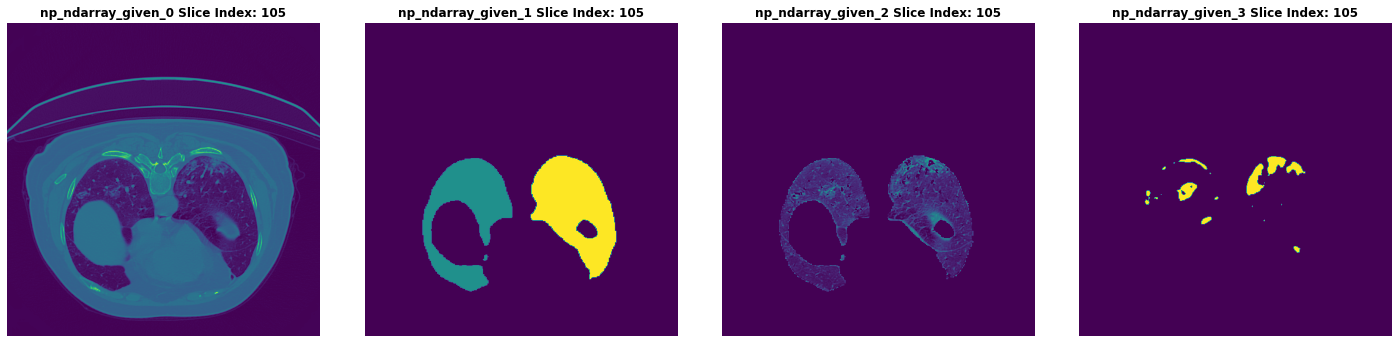

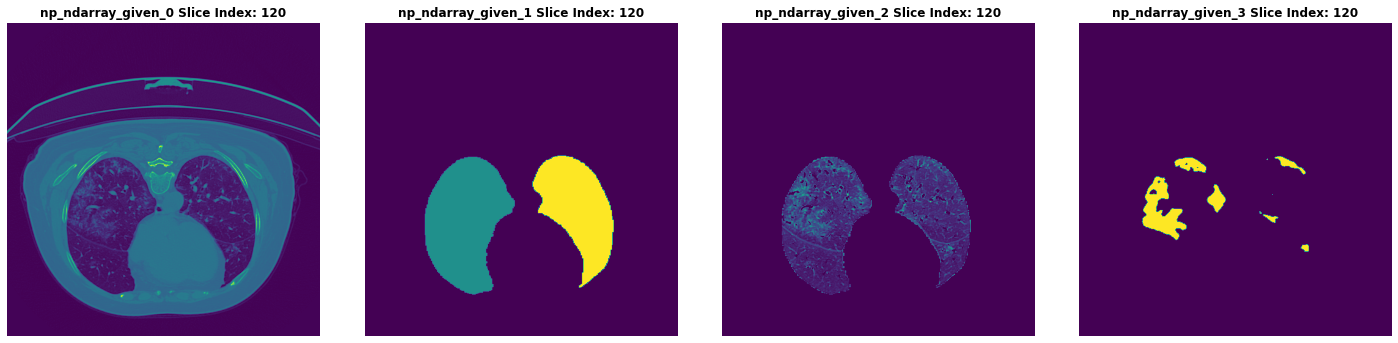

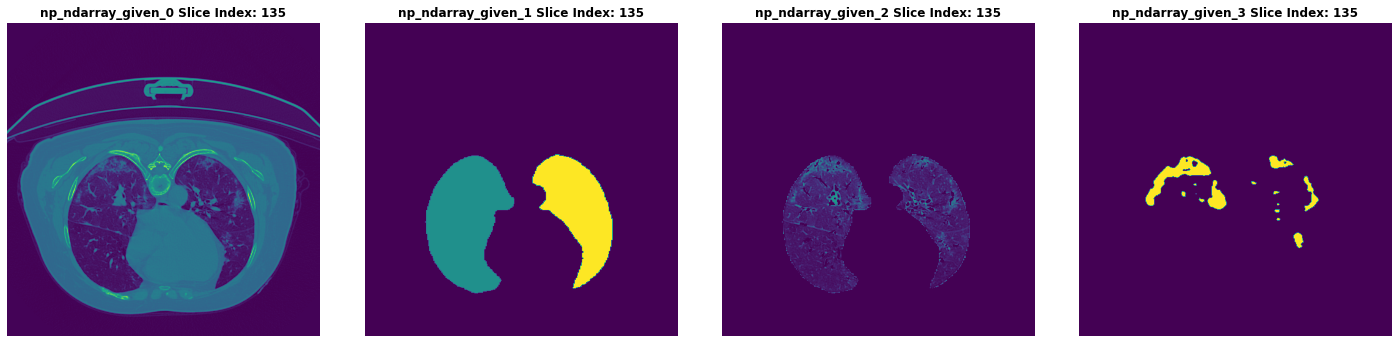

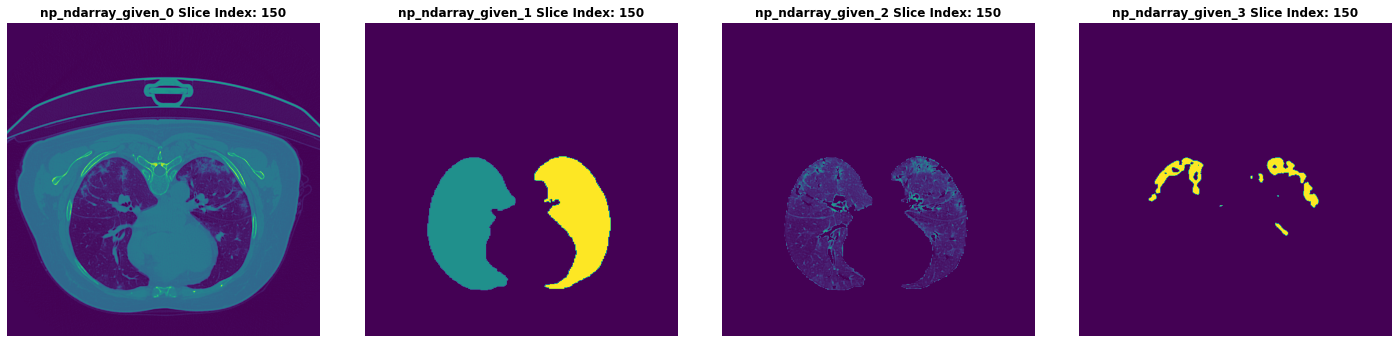

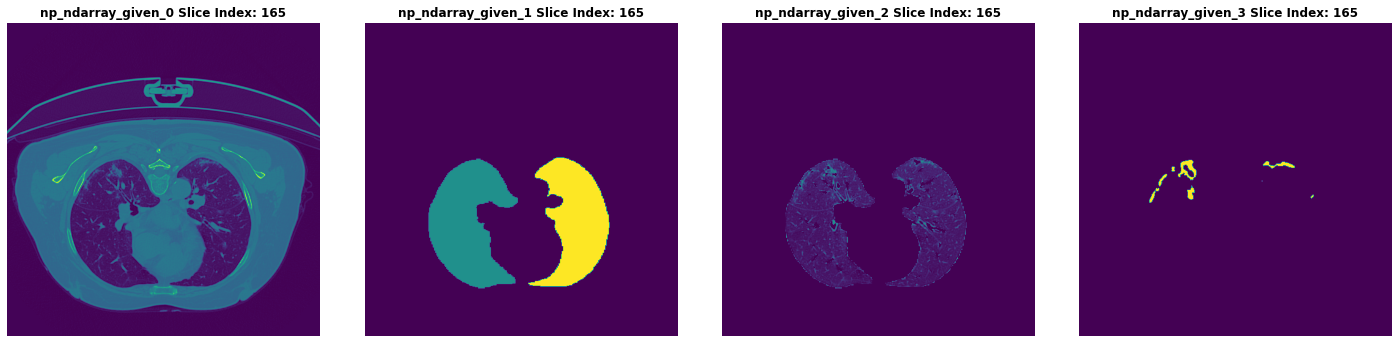

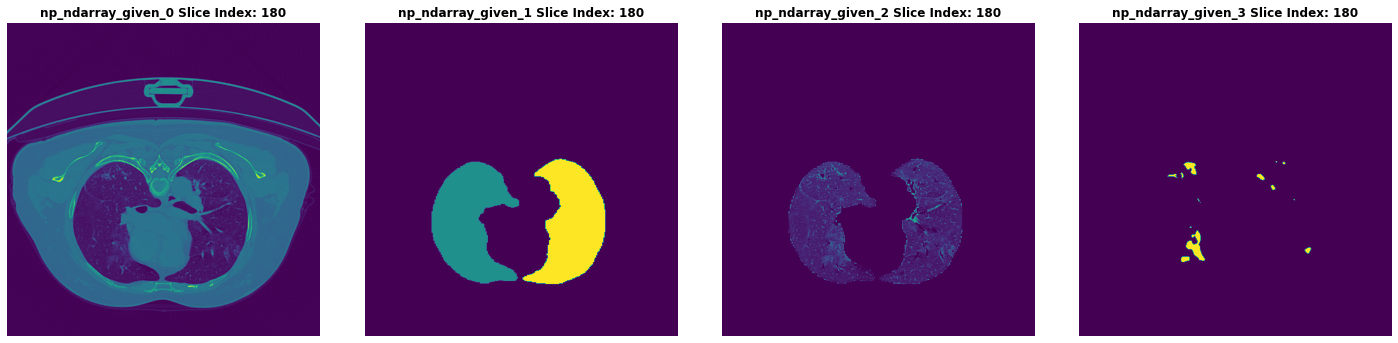

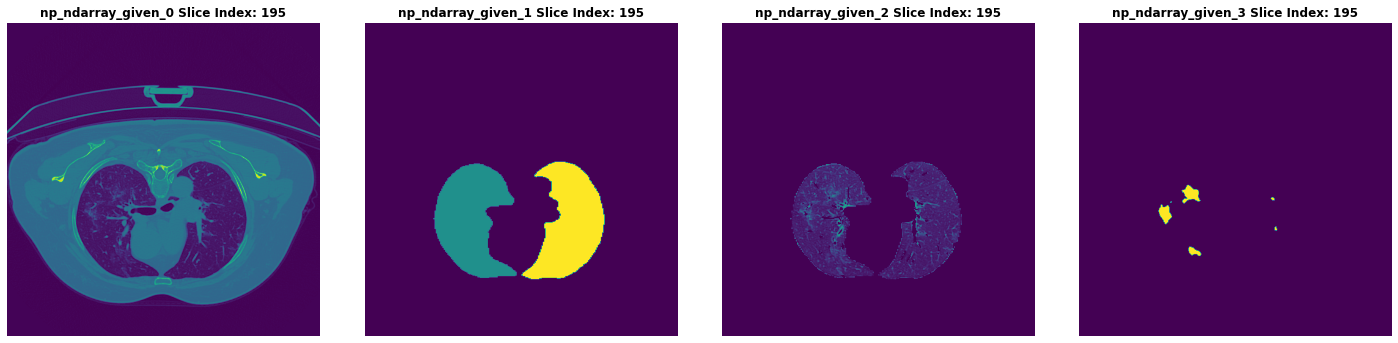

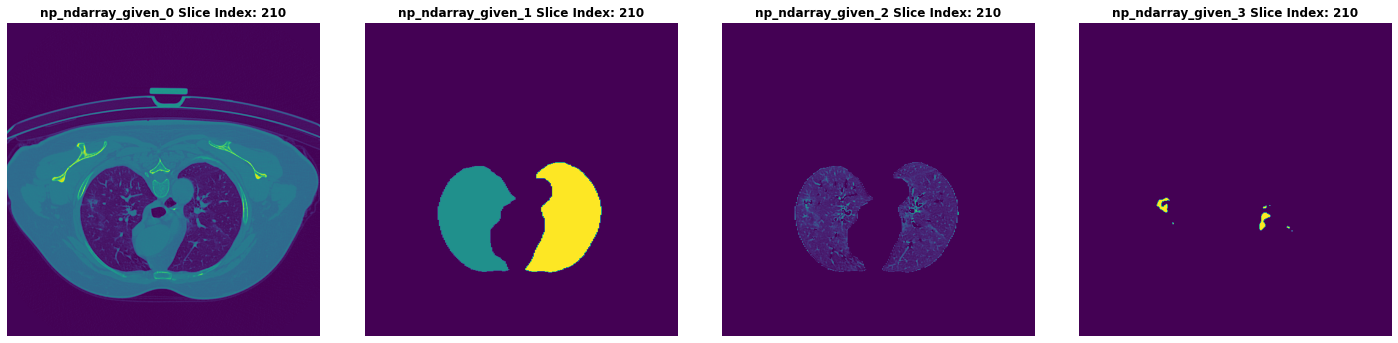

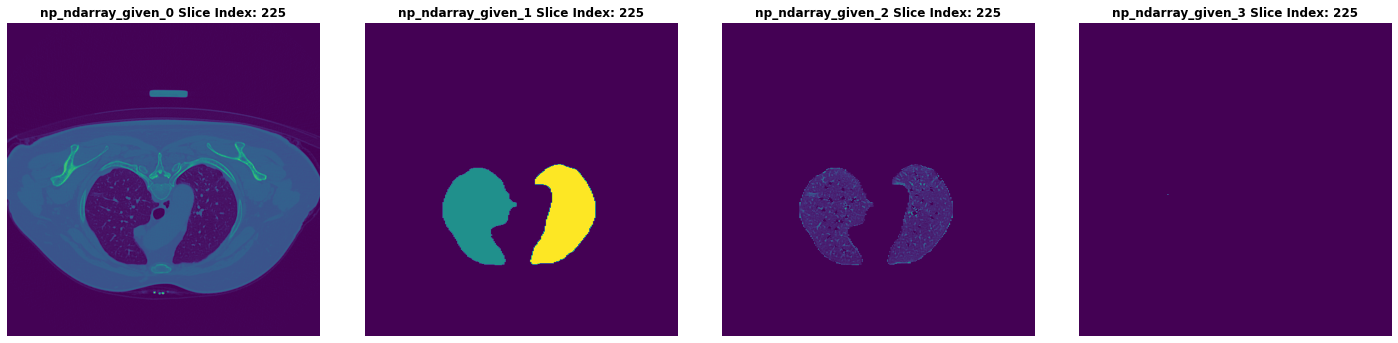

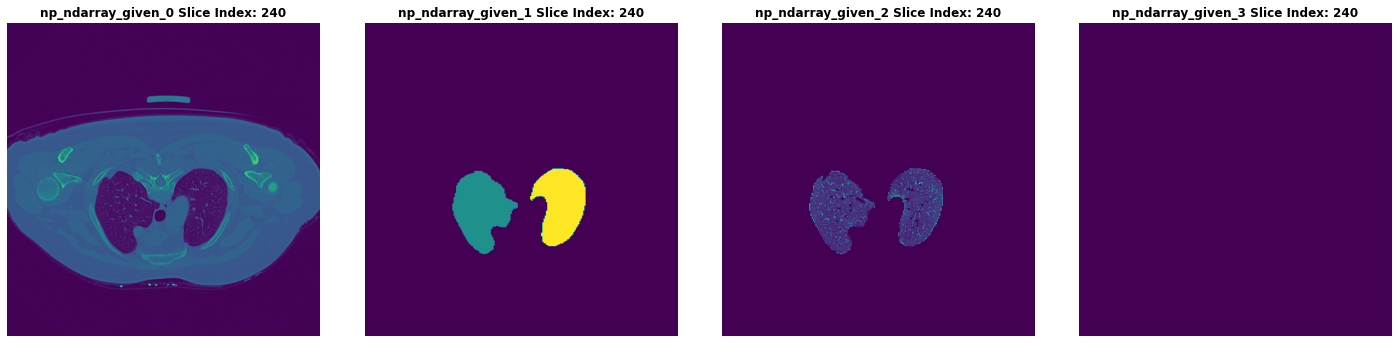

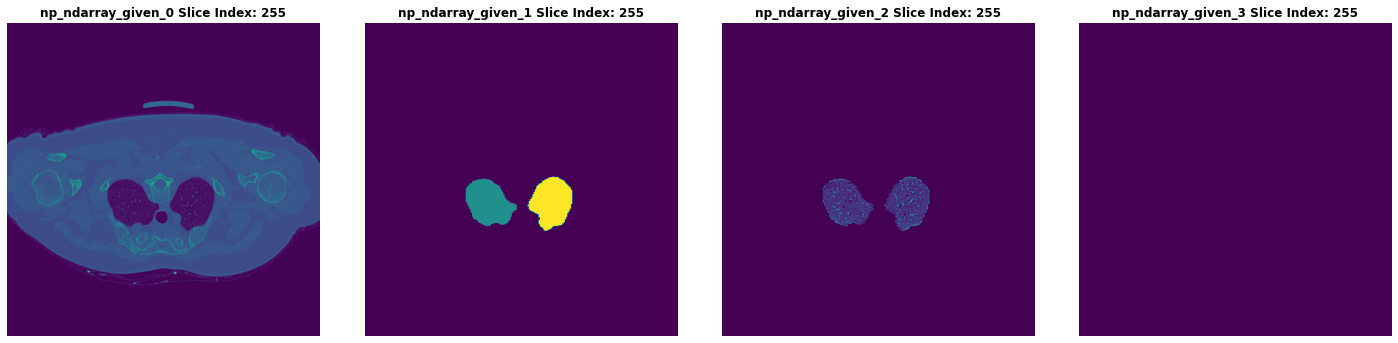

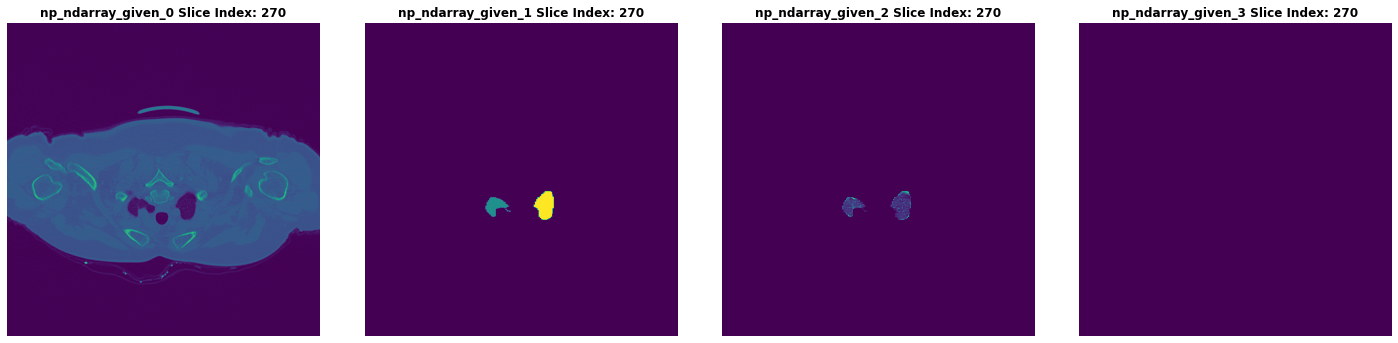

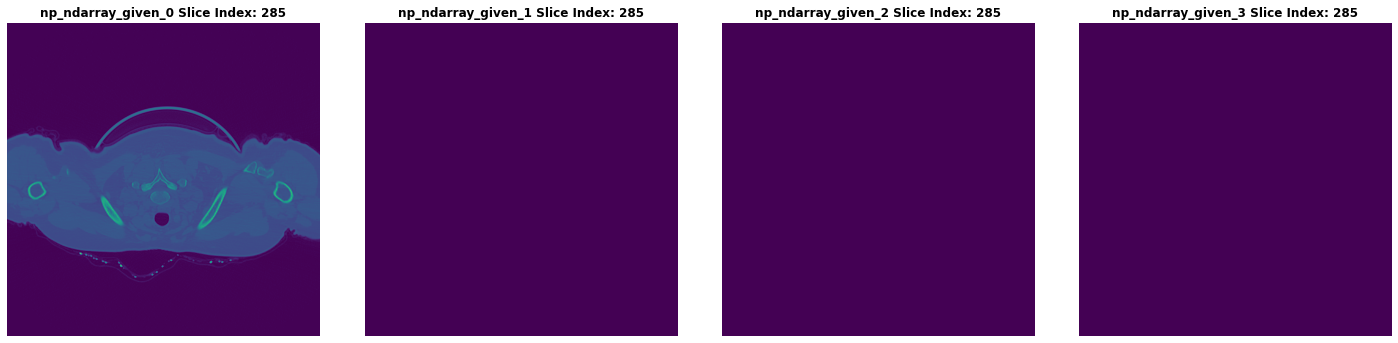

In [12]:
display_np_ndarray_shape_size_3_multi(
    (
        np_ndarray_original,
        np_ndarray_lung_segmentation_lungmask,
        np_ndarray_lung_extracted_ct_lung_seg,
        np_ndarray_covid_19_segmentation_ct_lung_seg
    ),
    20
)

### Calculating Severity Score

In [17]:
severity_score, area_lung_total, area_covid_19_total = util.calculate_count_region_sub_over_count_region_total(
    np_ndarray_lung_segmentation_lungmask,
    np_ndarray_covid_19_segmentation_ct_lung_seg
)

print(
    "Severity Score: {}\nTotal area of Lungs: {}\nTotal area of Covid-19: {}".format(severity_score,
                                                                                    area_lung_total,
                                                                                    area_covid_19_total))

Severity Score: 0.06782594125763848
Total area of Lungs: 5073000
Total area of Covid-19: 344081


In [25]:
from skimage import measure as skimage_measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [26]:
verts, faces, normals, values = skimage_measure.marching_cubes(np_ndarray_lung_segmentation_lungmask, 0)

In [32]:
verts

array([[ 50., 218., 183.],
       [ 51., 218., 182.],
       [ 51., 217., 183.],
       ...,
       [277., 308., 293.],
       [277., 308., 294.],
       [277., 308., 295.]], dtype=float32)

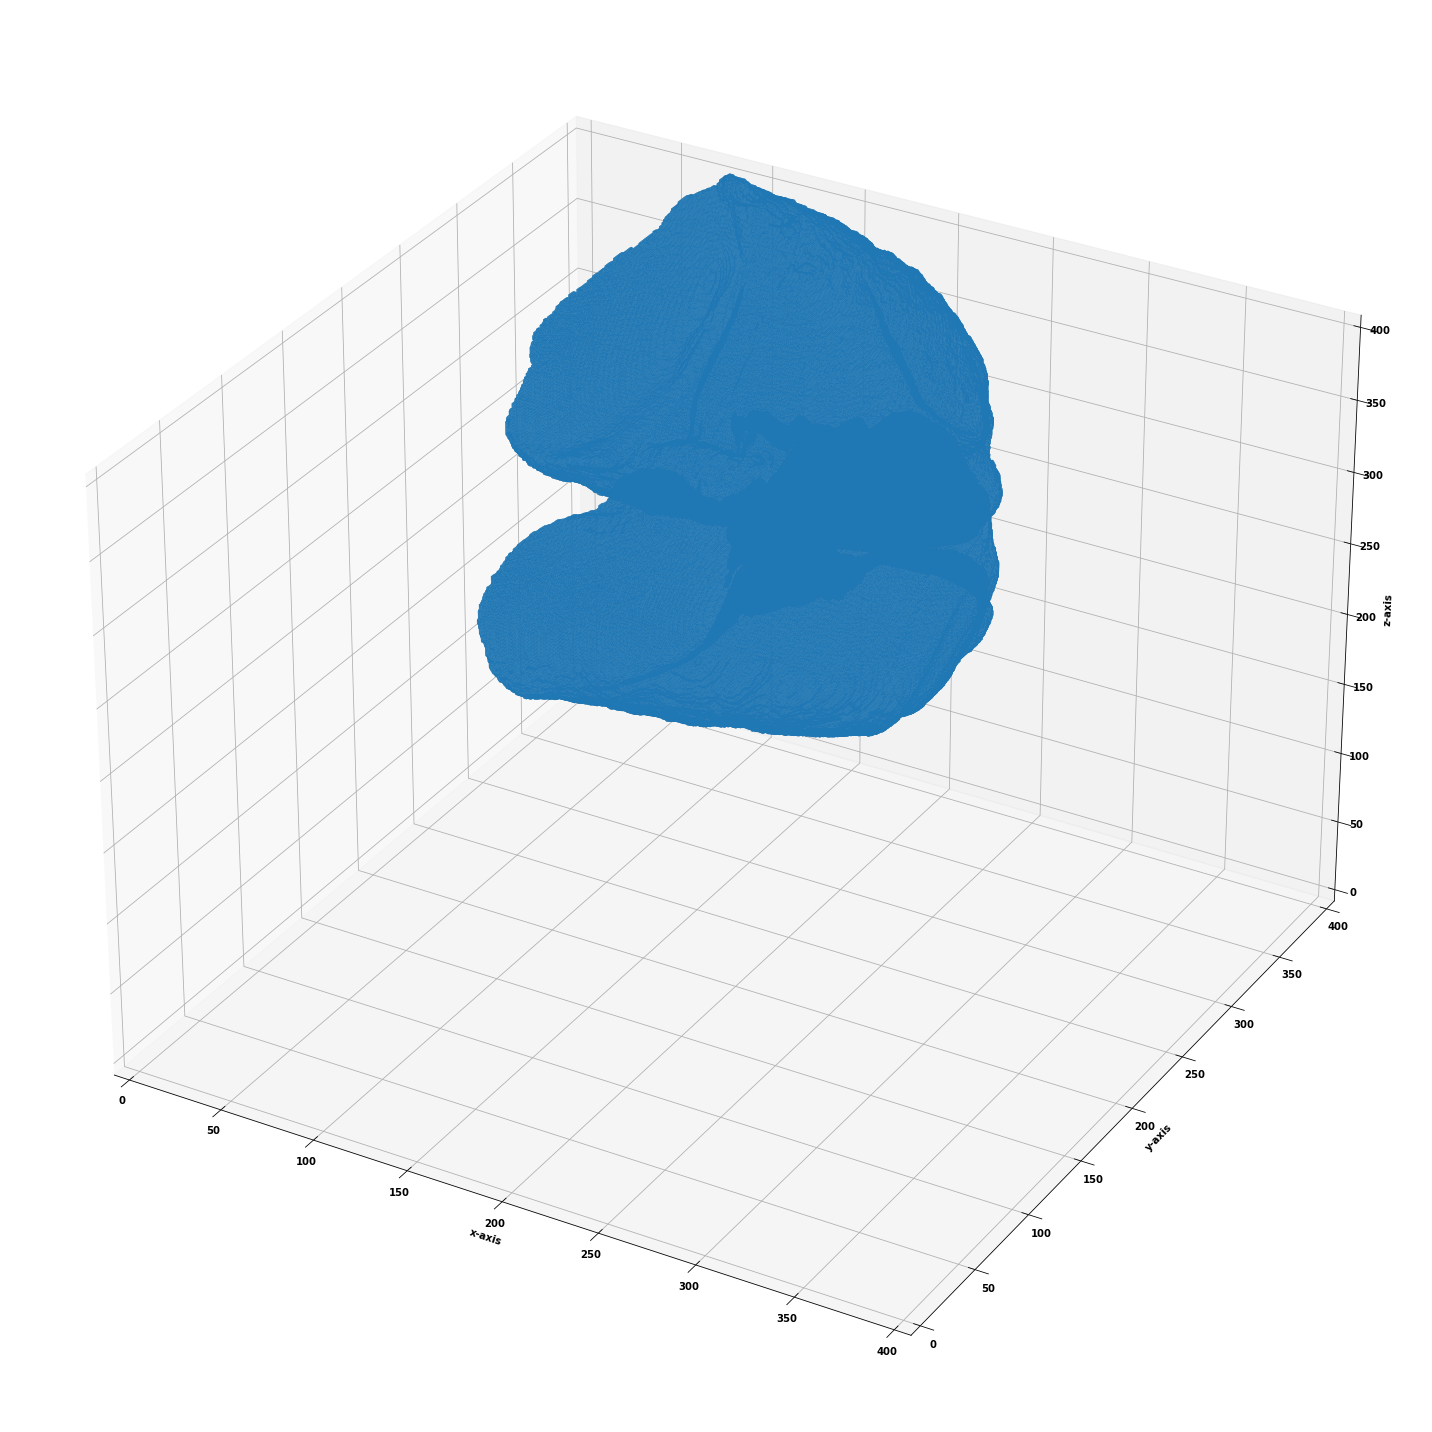

In [35]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
# mesh.set_edgecolor('red')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(0, 400)
ax.set_ylim(0, 400)  
ax.set_zlim(0, 400)

plt.tight_layout()
plt.show()